In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
aisles = pd.read_csv('aisles.csv')

In [8]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [5]:
departments = pd.read_csv('departments.csv')

In [14]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [19]:
products = pd.read_csv('products.csv')

In [36]:
products[products['department_id']==2]

,product_id,product_name,aisle_id,department_id
85,86,"Camilia, Single Liquid Doses",6,2
505,506,Arrowroot Powder,6,2
534,535,Rescue Remedy,6,2
675,676,Sunset Blush,6,2
712,713,Pink Moscato California,6,2
...,...,...,...,...
49540,49541,Sweet Echinacea,6,2
49541,49542,Grapefruit Bergamot Foaming Handwash,6,2
49595,49596,Psyllium Husk Powder,6,2
49612,49613,Sirloin Tip Roast,6,2


In [16]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [17]:
orders = pd.read_csv('orders.csv')

In [24]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
orders_prior= pd.read_csv('order_products__prior.csv')

In [22]:
orders_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [23]:
orders.eval_set.unique()

array(['prior', 'train', 'test'], dtype=object)

In [26]:
product_aisle = pd.merge(products,aisles, on = 'aisle_id', how = 'left')

In [27]:
product_aisle.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,2,All-Seasons Salt,104,13,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation


In [28]:
department_product_aisle = pd.merge(product_aisle, departments, on = 'department_id', how='left')

In [29]:
department_product_aisle.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [30]:
department_product_aisle.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [31]:
department_product_aisle.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
aisle            0
department       0
dtype: int64

In [1]:
import seaborn as sns

In [9]:
orders_prior = pd.merge(orders_prior, products, on='product_id', how='left')
orders_prior = pd.merge(orders_prior, aisles, on='aisle_id', how='left')
orders_prior = pd.merge(orders_prior, departments, on='department_id', how='left')
orders_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


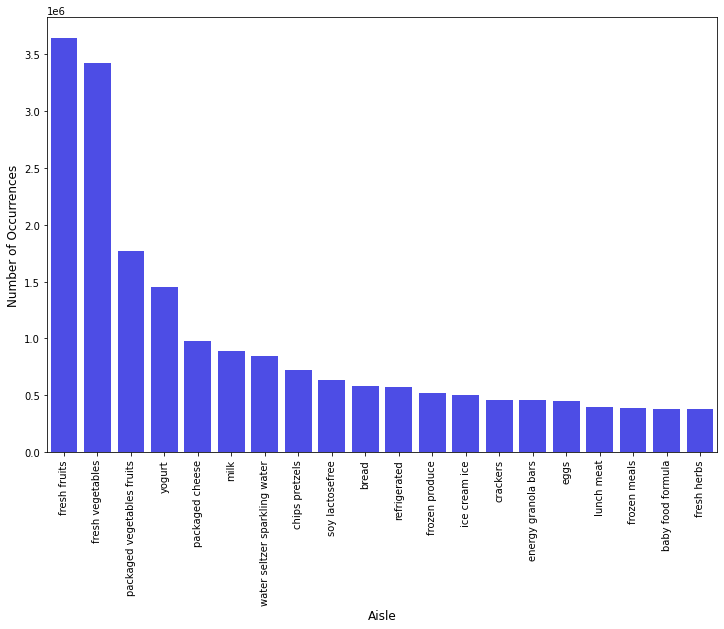

In [12]:
cnt_srs = orders_prior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()